# Fox vs Bunnnies
## O. Pauluis
In this Notebook, we investigate the shep vs. bunnies model. This model is detailed in Ch. 6 of Strogatz, and is based on two coupled ODE:
$$ \dot x = x (3 - x - 2y) $$
$$ \dot y = y (2 -x -y). $$ 


In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import ode
#plt.rcParams['figure.figsize'] = [30, 20]
#plt.rcParams['lines.linewidth'] = 4
#plt.rcParams['font.size'] = 36
from IPython.display import display, HTML

In [7]:
import warnings
from matplotlib.collections import LineCollection
def color_plot(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified between (x, y) points by a third value.

    It does this by creating a collection of line segments between each pair of
    neighboring points. The color of each segment is determined by the
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should have a size one less than that of x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Check color array size (LineCollection still works, but values are unused)
    if len(c) != len(x) - 1:
        warnings.warn(
            "The c argument should have a length one less than the length of x and y. "
            "If it has the same length, use the colored_line function instead."
        )

    # Create a set of line segments so that we can color them individually
    # This creates the points as an N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, **lc_kwargs)

    # Set the values used for colormapping
    lc.set_array(c)

    return ax.add_collection(lc)


In [8]:
# function that returns dy/dt

# 2nd order linear ode with matrix (aij) 
def lin_model(y,t,A):
    dydt = A @ y
    return dydt

# non-linear pendulum equation - equation (11) in section 9.2 of Boyce and DiPrima
def pend(y, t, gamma, O2):
    theta, omega = y
    dydt = [omega, -gamma*omega - O2*np.sin(theta)]
    return dydt

#competing species model - Section 9.4 in Boyce and DiPrima 
def competing_species(x,t,e1, e2, a11,a12,a21,a22):
    x1,x2 = x
    dxdt = [ x1 *(e1 - a11 * x1 - a12 * x2), x2 * (e2 -a21 * x2 - a22 * x1)]
    return dxdt

#Prey-Predator model - section 9.5 in Boyce and DiPrima
def prey_predator(x,t,a1,a2,c1,c2):
    x1,x2 = x
    dxdt = [x1 * (a1  - a2 * x2), x2 * (-c1 + c2 * x1)]
    return dxdt


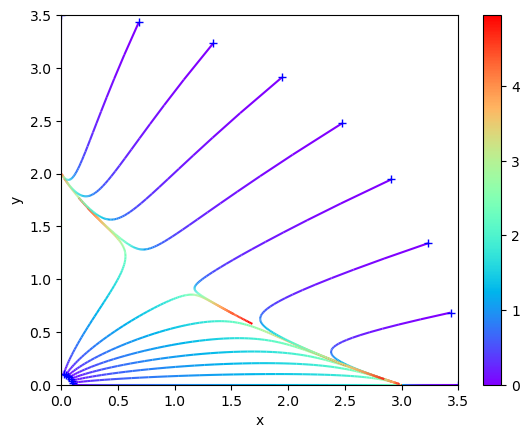

In [13]:
e1 = 3.0
a11 = 1.0
a12 = 2.0
e2 = 2.0
a21 = 1.0
a22 = 1.0

fig, ax = plt.subplots()

amp = .1
n = 8

for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")
    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
amp = 3.5
n = 8
for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    lines = color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")

    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
fig.colorbar(lines)


plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 3.5, 0, 3.5])
plt.show()

[1.0, 1.0]


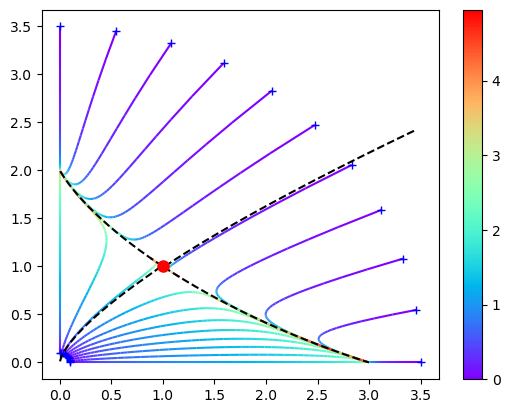

In [14]:
e1 = 3.0
a11 = 1.0
a12 = 2.0
e2 = 2.0
a21 = 1.0
a22 = 1.0
amp = .1

fig, ax = plt.subplots()
amp = .1
n = 10

for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")
    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
amp = 3.5
n = 10
for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    lines = color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")

    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
fig.colorbar(lines)


node = [(a22 * e1 - a12 * e2)/(a22*a11-a12*a21),-(a21 * e1 - a11 * e2)/(a22*a11-a12*a21)]
y0 = [node[0]+0.02,node[1]]
t = np.linspace(0, 20, 401)
sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
plt.plot(sol[:,0],sol[:,1],'k--')
t = np.linspace(0, -1.8, 401)
sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
plt.plot(sol[:,0],sol[:,1],'k--')
y0 = [node[0]-0.02,node[1]]
t = np.linspace(0, 20, 401)
sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
plt.plot(sol[:,0],sol[:,1],'k--')
t = np.linspace(0, -20, 401)
sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
plt.plot(sol[:,0],sol[:,1],'k--')
plt.plot(node[0],node[1],'ro',markersize =8)
print(node)
plt.show()

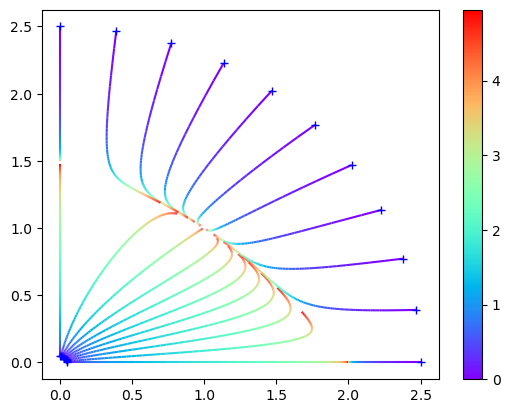

In [20]:
e1 = 2.0
a11 = 1.0
a12 = 1.0
e2 = 1.5
a21 = 1.0
a22 = 0.5
amp = .1


fig, ax = plt.subplots()
amp = .05
n = 10

for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")
    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
amp = 2.5
n = 10
for i in range(n+1):
    y0 = [amp * np.cos(0.5 * np.pi * i / n) , amp * np.sin(0.5* np.pi * i / n)] 
    t = np.linspace(0, 5, 101)
    sol = odeint(competing_species, y0, t, args=(e1,e2,a11,a12,a21,a22))
    lines = color_plot(sol[:,0],sol[:,1],t[:-1],ax,cmap="rainbow")

    plt.plot(sol[0,0],sol[0,1],'b+',markersize = 6)
fig.colorbar(lines)

plt.show()